In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [ ]:
swedish_motor_insurance=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W8 - Data Sets/swedish_motor_insurance.csv")

In [ ]:
taiwan_real_estate=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W8 - Data Sets/taiwan_real_estate2.csv")
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

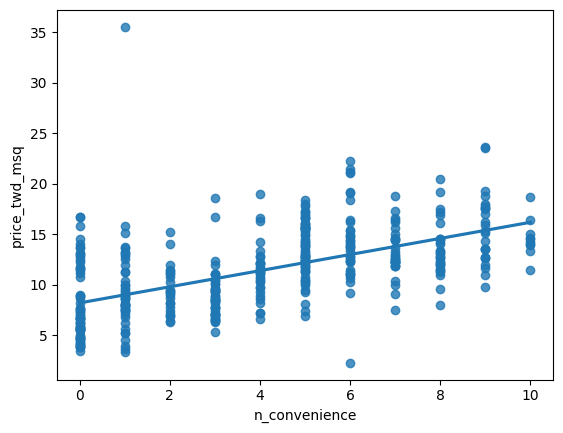

In [ ]:
sns.regplot(x="n_convenience",y="price_twd_msq",data=taiwan_real_estate,ci=None)

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

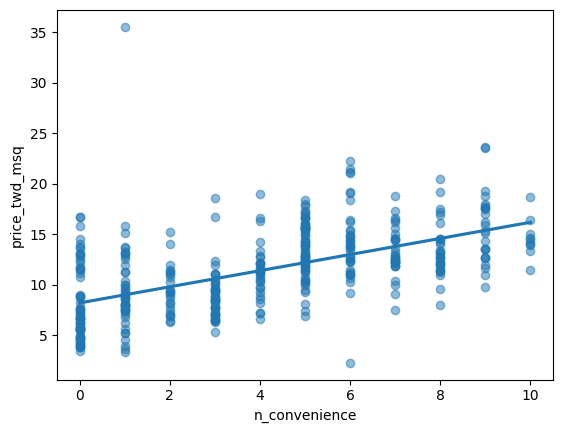

In [ ]:
sns.regplot(x="n_convenience",y="price_twd_msq",data=taiwan_real_estate,ci=None,scatter_kws={'alpha': 0.5})

In [ ]:
mdl_payment_vs_claimes = ols("txotal_payment_sek ~ n_claims", data = swedish_motor_insurance)
mdl_payment_vs_claimes=mdl_payment_vs_claimes.fit()
print(mdl_payment_vs_claimes.params)

Intercept    19.994486
n_claims      3.413824
dtype: float64


In [ ]:



##variable_name = old(" responseVariable ~ explanatoryVariable ,data=dataset")
mdl_price_vs_conv = ols("price_twd_msq  ~  n_convenience", data = taiwan_real_estate)
mdl_price_vs_conv=mdl_price_vs_conv.fit()
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [ ]:
fish=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W8 - Data Sets/fish.csv")

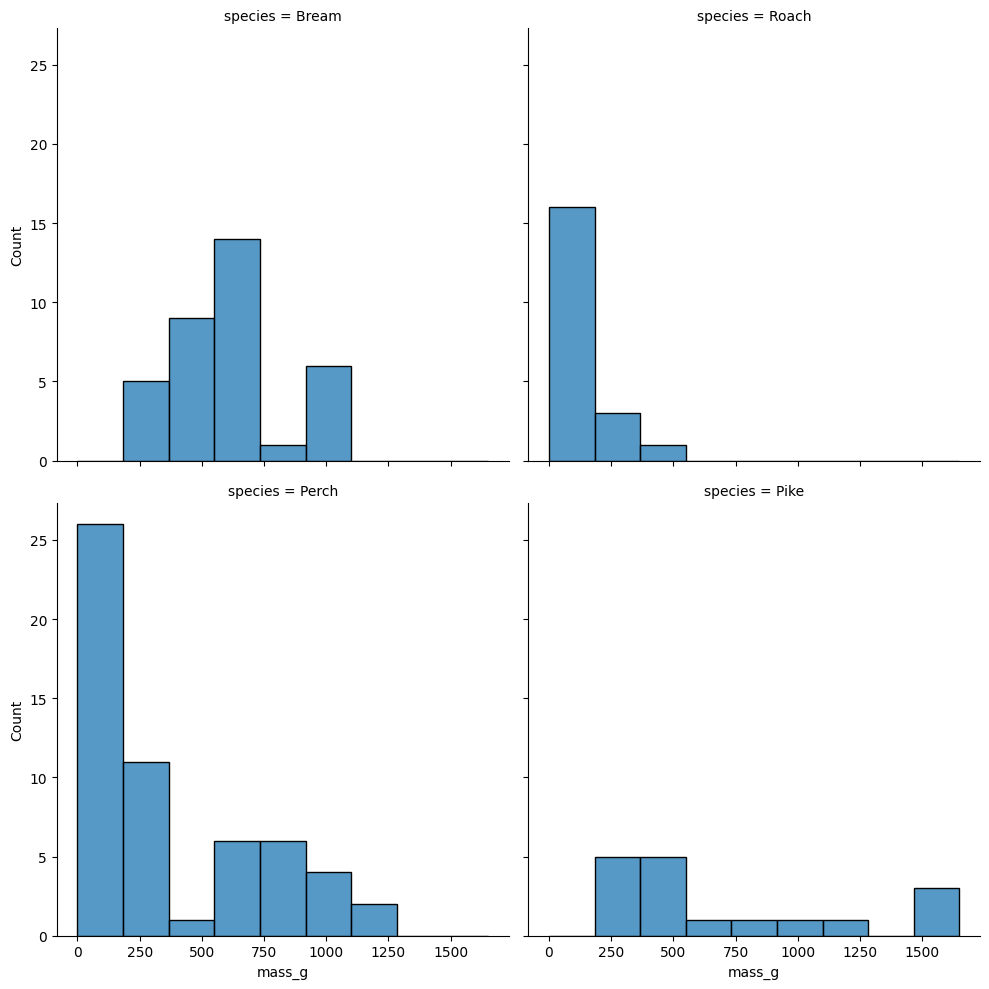

In [ ]:
sns.displot(data=fish,
            x="mass_g",
            col="species",
            col_wrap=2,
            bins=9)
plt.show()

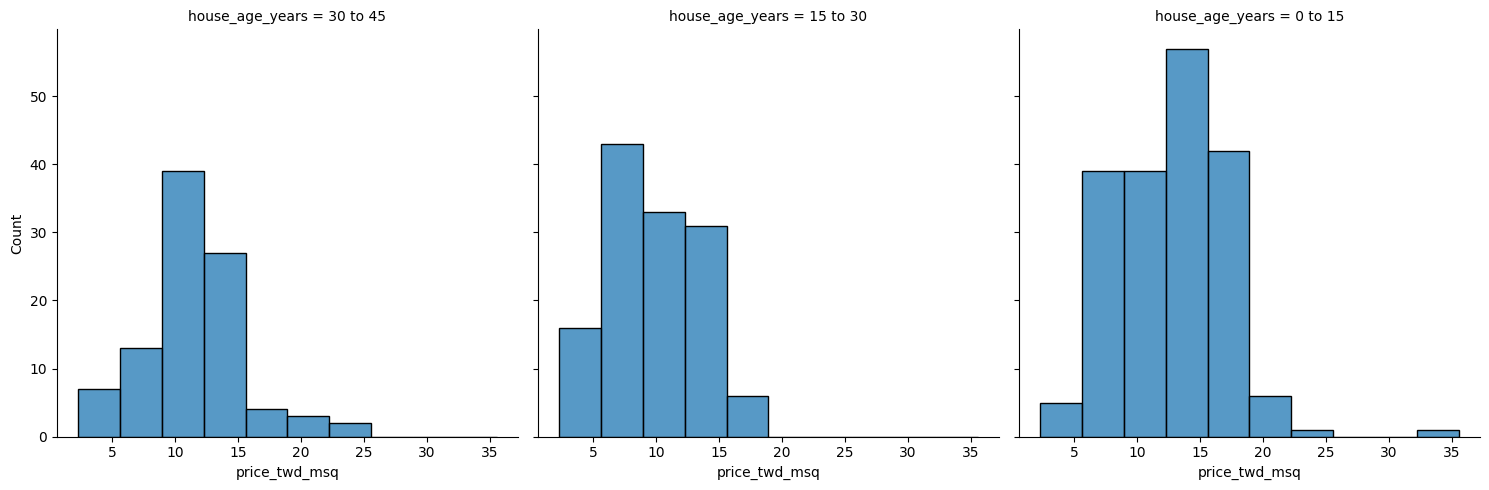

In [ ]:
sns.displot(data=taiwan_real_estate,
            x="price_twd_msq",
            col="house_age_years",
            col_wrap=3,
            bins=10)
plt.show()

In [ ]:
mdl_price_by_age=ols(" price_twd_msq ~ house_age_years ",data=taiwan_real_estate).fit()
# taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()
print(mdl_price_by_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [ ]:
mdl_price_vs_age0=ols(" price_twd_msq ~ house_age_years +0",data=taiwan_real_estate).fit()
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [ ]:
#create model
#make explanatory values to predict
#predict




explanatory_data=pd.DataFrame({"n_convenience": np.arange(0,11)})


price_twd_msq=mdl_price_vs_conv.predict(explanatory_data)

print(price_twd_msq)


0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [ ]:
prediction_data=explanatory_data.assign(price_twd_msq=price_twd_msq)
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [ ]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs[0]
slope = coeffs[1]
# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)
# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


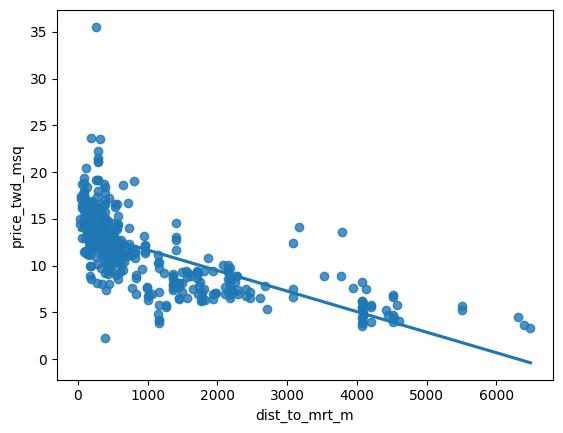

<Axes: xlabel='sqrt_dist_to_mrt_m', ylabel='price_twd_msq'>

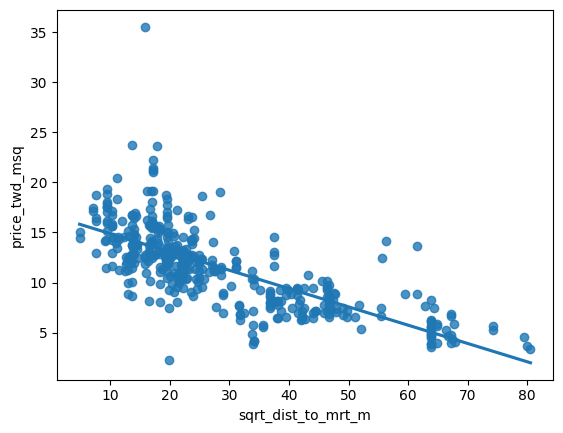

In [ ]:
#Do the points track the line more closely?
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
plt.figure()
# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

In [ ]:

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [ ]:
#Print the predictions.
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
 "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
 price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)
# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


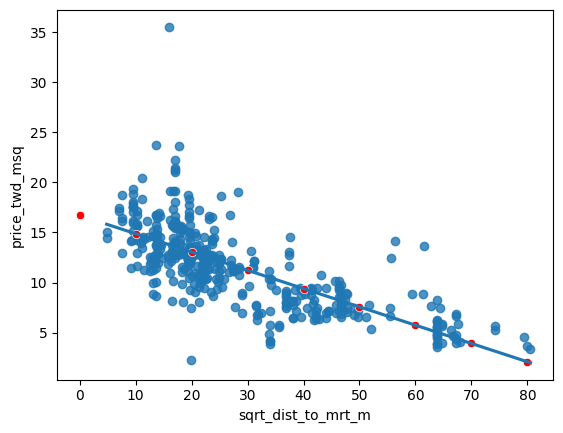

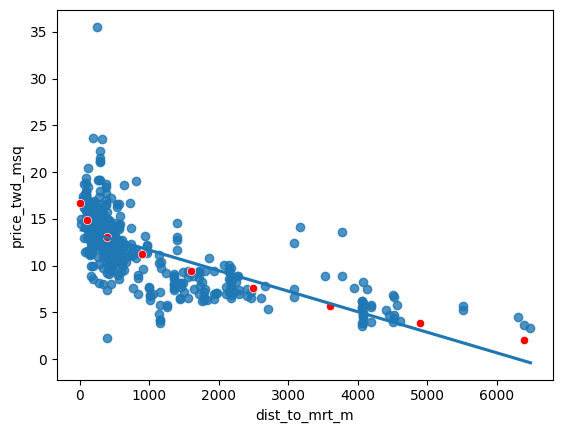

In [ ]:

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()
fig = plt.figure()
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a layer of your prediction points
sns.scatterplot(x="dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()